<a href="https://colab.research.google.com/github/cpvivek/Global-Terrorism-Database-EDA/blob/main/Global_Terrorism_Database_EDA__Vivek_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**note**: Git hub is not able to display a few visualisation I have generated using plotly.express library. I request you to view this notebook on google colaboratory for a better experience. 
Alternatively, I have placed link to the colab notebook code cell with prompt at every instances the visualisation isn't displayed. You may redirect from there as well.

# EDA on Global Terrorism Database: A capstone project submitted to Alma Better as a course completion requirement.

# Global Terrorism Database
Global Terrorism Database (GTD) is a dataset maintained by National Consortium for the Study of Terrorism and Responses to Terrorism (START), and contains the record of terrorism activities around the globe since 1970.

# Problem Statement
To perform EDA on the global terrorism database to derive meaningful insights and patterns from it.

# Scope of the Project
Since this is an exploratory data analysis project, the scope of the project would be limited to deriving meaningful insights/patterns from the dataset, on a global, regional (Primarily South Asian) and national(India) level. 
The focus here would not essentialy be on obtaining solutions to problems pertaining to terrorism, but rather to derive intuitons from the dataset and find out what is going on.

My contribution to the project as an individual are focused on following deliverables:



1. Visual Representation of attacks over the globe.
2. Word cloud displaying the group names with font size proportional to frequency of attacks.
3. Which group has the highest success rate?
4. Success rate of different attack types.
5. Actions of major groups.
6. Which group has attacked most number of countries?
7. Heat Maps
8. Tree Maps
9. Time lines





# Data Preparation

Since this is a huge data set with over 136 fields and 1.8 lakh rows, we need to weed out unrequired fields, fill NaN values appropriately, and rename the fields to suit our convenience.

In [1]:
#let's take help of following libraries
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #I prefer to use plotly.express predominantly for most of my visualisation. 
import plotly.graph_objects as go   

upgrading plotly to 5.3.1 tennacity 8.0.1

In [2]:
pip install --upgrade plotly

In [3]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The following dataset contains records of terrorist attacks from 1970 all the way to 2017

In [4]:
# Reading the dataset. 
gtd_global_primary=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alma Better Pro Program/Capstone Projects/EDA Capstone/Data Sets/Global Terrorism Data/Global Terrorism Data_2017.csv',encoding='ISO-8859-1',low_memory=False)


In [5]:
gtd_global_primary.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
#columns in the dataset:
list(gtd_global_primary)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

A lot of the field names here are hard to make sense of. So here's a code book if you're curious.

https://www.start.umd.edu/gtd/downloads/Codebook.pdf

In [7]:
#cleaning up dataset and selecting fields that I believe we need for the analysis
gtd_global=gtd_global_primary[['eventid','iyear','imonth','iday','country_txt','region_txt', 'city','provstate',
                       'latitude','longitude','summary','success','suicide','attacktype1_txt','targtype1_txt',
                       'gname','claimed','motive','weaptype1_txt','nkill','nwound','propvalue']]
                       

In [8]:
#cleaning up the NaN values.
gtd_global['country_txt'].fillna('Unknown',inplace=True)
gtd_global['region_txt'].fillna('Unknown',inplace=True)
gtd_global['city'].fillna('Unknown',inplace=True)
gtd_global['provstate'].fillna('Unknown',inplace=True)
gtd_global['latitude'].fillna('Unknown',inplace=True)
gtd_global['longitude'].fillna('Unknown',inplace=True)
gtd_global['summary'].fillna('Unknown',inplace=True)
gtd_global['success'].fillna('Unknown',inplace=True)
gtd_global['suicide'].fillna('Unknown',inplace=True)
gtd_global['attacktype1_txt'].fillna('Unknown',inplace=True)
gtd_global['targtype1_txt'].fillna('Unknown',inplace=True)
gtd_global['gname'].fillna('Unknown',inplace=True)
gtd_global['claimed'].fillna(0,inplace=True) #You can't really 'not know' if its claimed. :/. I'm taking the liberty to assume the NaN values here are unclaimed.
gtd_global['motive'].fillna('Unknown',inplace=True)
gtd_global['weaptype1_txt'].fillna('Unknown',inplace=True)
gtd_global['nkill'].fillna(0,inplace=True)
gtd_global['nwound'].fillna(0,inplace=True)
gtd_global['propvalue'].fillna(0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [9]:
#renaming the columns
gtd_global.rename(columns={'iyear':'year',
                           'imonth':'month',
                           'iday':'day',
                           'country_txt':'country',
                           'region_txt':'region',
                           'provstate':'state',
                           'attacktype1_txt':'attack_type',
                           'targtype1_txt':'target_type',
                           'gname':'organisation',
                           'weaptype1_txt':'weapon_type'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
#adding casuality column to the data frame. Casulities= nwound+casuality
gtd_global['casuality']=gtd_global.nkill+gtd_global.nwound

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
#creating subsets for the regional and national level analysis
gtd_SA=gtd_global[gtd_global.region=='South Asia']
gtd_india=gtd_global[gtd_global.country=='India']


#1. Global Visualisation of attacks over the world
Let's zoom out and have a look at the situation.

In [12]:
#creating a df with frequency of attacks grouped by countries
gtd_country=gtd_global.groupby('country')['eventid'].count().reset_index() #this would give us total number of attack in each country over the time

gtd_country_timeline=gtd_global.groupby(['year','country'])['eventid'].count().reset_index() # this dataframe would help us with a timeline of every year since 1970


**Git hub is not able to display the visualisations generated here using plotly.express. Kindly redirect to the code cell in google colaboratory notebook using following link to see the visualisation:**

[link text](https://colab.research.google.com/drive/1y0l-stmOruN3uDceQMJIM57zQ6T7l63U#scrollTo=fxUY0SLhN3Fa&line=8&uniqifier=1)

In [13]:
#visualisation
total_attacks=px.choropleth( gtd_country,locations='country',locationmode='country names',color='eventid',
                  hover_name='country',projection='orthographic',title='Total number of attacks(1970-2017)'
                  ,color_continuous_scale = px.colors.sequential.Plasma,
                  labels={'eventid':'attacks'})

total_attacks.show()


timeline=px.choropleth(gtd_country_timeline,locations='country',locationmode='country names',color='eventid',
                  hover_name='country',title='Time line of attacks in each year from 1970 to 2017',
                  color_continuous_scale = px.colors.sequential.Plasma,
                  animation_frame='year',
                  labels={'eventid':'attacks'},)

timeline.show()

print('use the animation frame above to navigate through years')

use the animation frame above to navigate through years


**Remarks**
1. It's evident from the figure that the terrorist attacks are quite concentrated in a handful of countries like Afghanistan, Pakistan, Iraq, India etc.

2. It can be observed that things started getting grim for India in the late 80s, where it started gaining more traction than the rest of the countries.

# 2. Word cloud displaying the group names with font size proportional to frequency of attacks.
Word cloud is a useful way to assess the data at a glance

In [14]:
#df with organisations and corresponding frequency of attacks
global_org_frequency=gtd_global.groupby('organisation')['eventid'].count().reset_index().rename(columns={'eventid':'attacks'})

In [15]:
#creating dictionary with group names and corresponding frequency of attacks. We'll be using this dictionary to generate the wordlcoud
organisation_dict={}
for group,attacks in zip(global_org_frequency.organisation,global_org_frequency.attacks):
  organisation_dict[group]=attacks

In [16]:
from wordcloud import WordCloud #Importing wordcloud library.
plt.rcParams['figure.figsize']=(20,20) #setting figure size

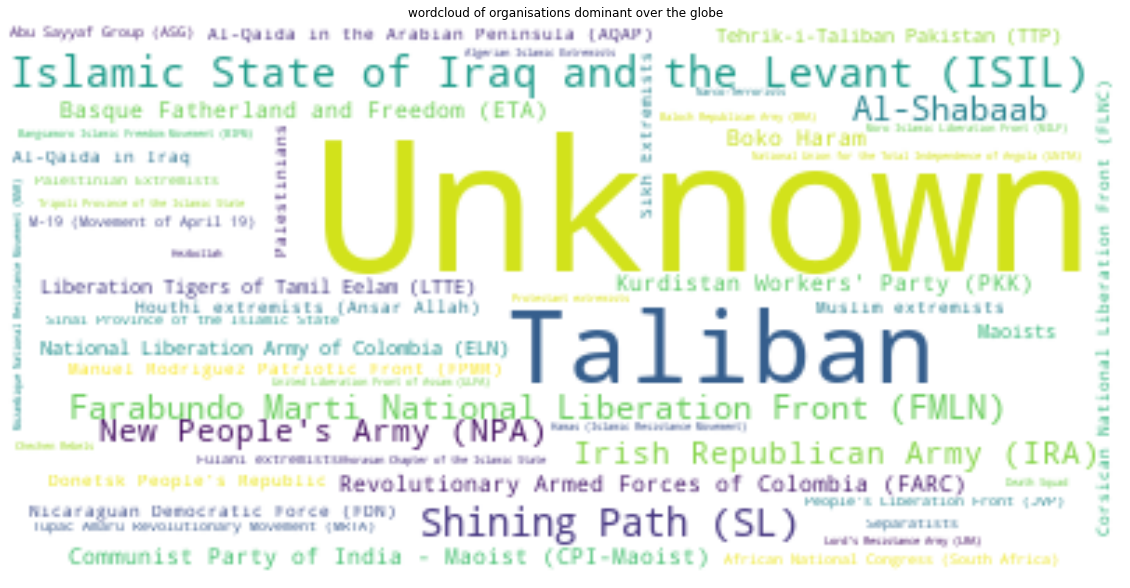

In [17]:
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=organisation_dict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('wordcloud of organisations dominant over the globe')
plt.axis("off")
plt.show()



**Remarks**:

The unknown faction, accounts for majority of the attacks. These could be the attacks which are not claimed by any organisation, or work of an individual or small group of individuals, belonging to no formal organisation.
Putting aside the unknown, Taliban clearly towers above the the rest in terms of attack frequency.
ISIL, IRA, NPA, CPI(Maiosts), PKK are few other noteable organisations.

**South Asia**

In [18]:
#df with organisation and corresponding frequency of attacks
SA_org_frequency=gtd_SA.groupby('organisation')['eventid'].count().reset_index().rename(columns={'eventid':'attacks'})

In [19]:
organisation_sth_asia_dict={} #We'll use this dict to generate the wordcloud
for group,attacks in zip(SA_org_frequency.organisation,SA_org_frequency.attacks):
  organisation_sth_asia_dict[group]=attacks

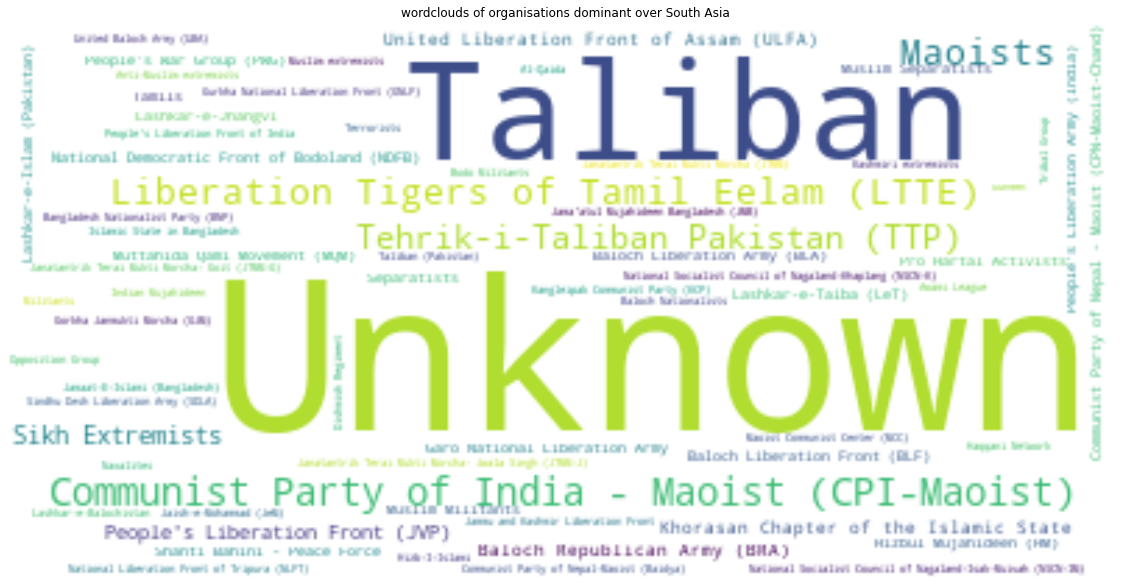

Word cloud of group attack frequencies across South East Asia


In [20]:
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=organisation_sth_asia_dict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('wordclouds of organisations dominant over South Asia')
plt.axis("off")
plt.show()
print("Word cloud of group attack frequencies across South East Asia")



Remarks:

1. The unknown faction remains the major contributor here too.
2. Taliban again, leads in terms of attacks over the South Asia Region.
3. Communist Party of India(Maoists), TTP, LTTE are few other organisation with considerable attack frequency.

**India**

In [21]:
india_org_frequency=gtd_india.groupby('organisation')['eventid'].count().reset_index().rename(columns={'eventid':'attacks'})

In [22]:
organisation_india_dict={}
for group,attacks in zip(india_org_frequency.organisation,india_org_frequency.attacks):
  organisation_india_dict[group]=attacks

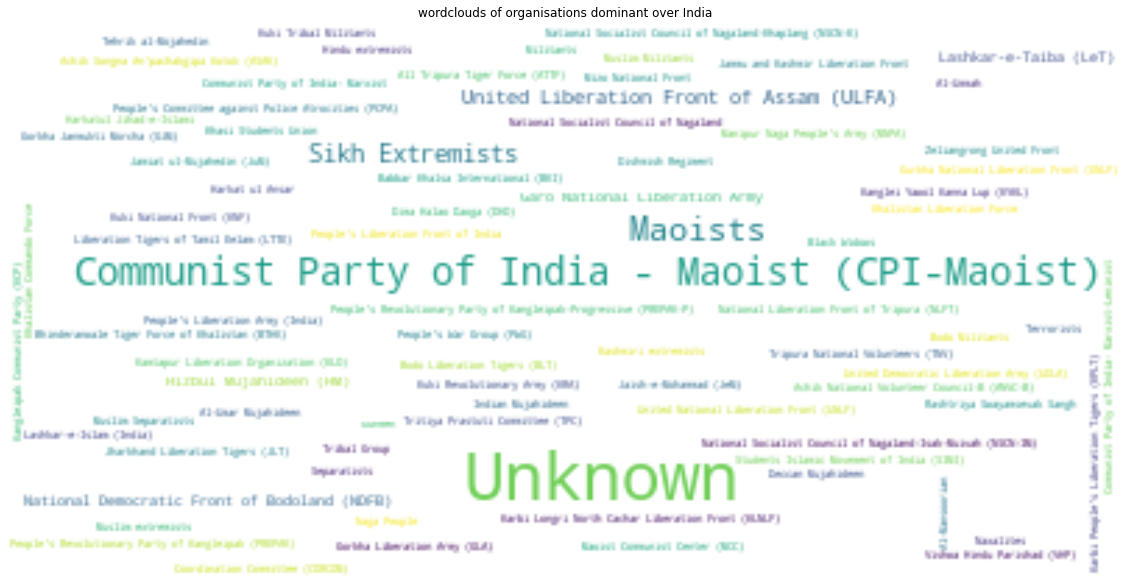

In [23]:
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=organisation_india_dict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('wordclouds of organisations dominant over India')
plt.axis("off")
plt.show()

**Remarks:**

1. CPI(Maoists) is the organisation with greatest attack frequency in India.
2. We could say the majority of the attacks are caused by the top few organisations here.
3. Sikh Extremists, Maoists, ULFA are few of the major players here.

# 3. Which group has highest success rate at all three levels?
Are the groups with the most attack frequency the most succesful ones?

# Success Parameters

All the attacks in the data set are classified under 8 different types of attacks:

1. Assassination	
2. Armed Assault
3. Bombing/Explosion	
4. Facility/Infrastructure Attack	
5. Hijacking	
6. Hostage Taking (Kidnapping)	
7. Hostage Taking (Barricade Incident)	
8. Unarmed Assault
9. Unknown

The parameters that define whether or not these attack types were succesful differs from one to other. Let's have a look at success parameter of each attack type:

1.**ASSASSINATION**

In order for an assassination to be successful, the target of the assassination must be killed. For example, even if an attack kills numerous people but not the target, it is an unsuccessful assassination.

2.**ARMED ASSAULT**

An armed assault is determined to be successful if the assault takes place and if a target is hit (including people and/or property). Unsuccessful armed assaults are those in which the perpetrators attack and do not hit the target. An armed assault is also unsuccessful if the perpetrators are apprehended on their way to commit the assault. To make this determination, however, there must be information to indicate
that an actual assault was imminent.

3.**BOMBING/EXPLOSION**

A bombing is successful if the bomb or explosive device detonates. Bombings are considered unsuccessful if they do not detonate. The success or failure of the bombing is not based on whether it hit the intended target.

4.**HIJACKING**

A hijacking is successful if the hijackers assume control of the vehicle at any point, whereas a hijacking is unsuccessful if the hijackers fail to assume control of the vehicle. The success or failure of the hijacking is not based on whether the vehicle reached the intended destination of the hijackers.

5.**HOSTAGE TAKING (BARRICADE INCIDENT)**

A barricade incident is successful if the hostage takers assume control of the individuals at any point, whereas a barricade incident is unsuccessful if the hostage takers fail to assume control of the individuals.

6.**HOSTAGE TAKING (KIDNAPPING)**

A kidnapping is successful if the kidnappers assume control of the individuals at any point, whereas a kidnapping is unsuccessful if the kidnappers fail to assume control of the individuals.

7.**FACILITY / INFRASTRUCTURE ATTACK**

A facility attack is determined to be successful if the facility is damaged. If the facility has not been damaged, then the attack is unsuccessful.

8.**UNARMED ASSAULT**

An unarmed assault is determined to be successful if there is a victim who has been injured. Unarmed assaults that are unsuccessful are  those in which the perpetrators do not injure anyone. An unarmed assault is also unsuccessful if the perpetrators are apprehended when on their way to commit the assault. To make this determination, however, there must be information to indicate that an assault
was imminent.

**Count plot of succesful and unsuccesful attacks over the years**

In [24]:
#setting figure parameters
plt.rcParams['figure.figsize']=[25,10]

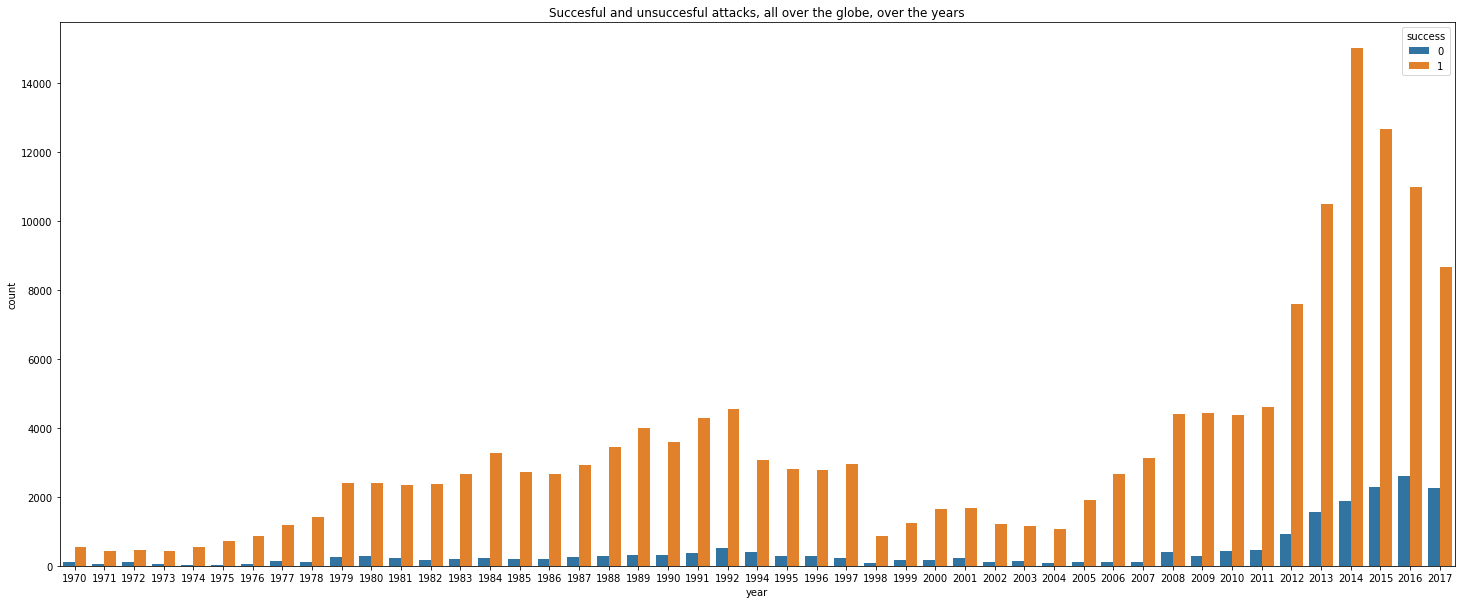

In [25]:
#Global
sns.countplot(x='year',hue='success',data=gtd_global)
plt.title('Succesful and unsuccesful attacks, all over the globe, over the years')
plt.show()

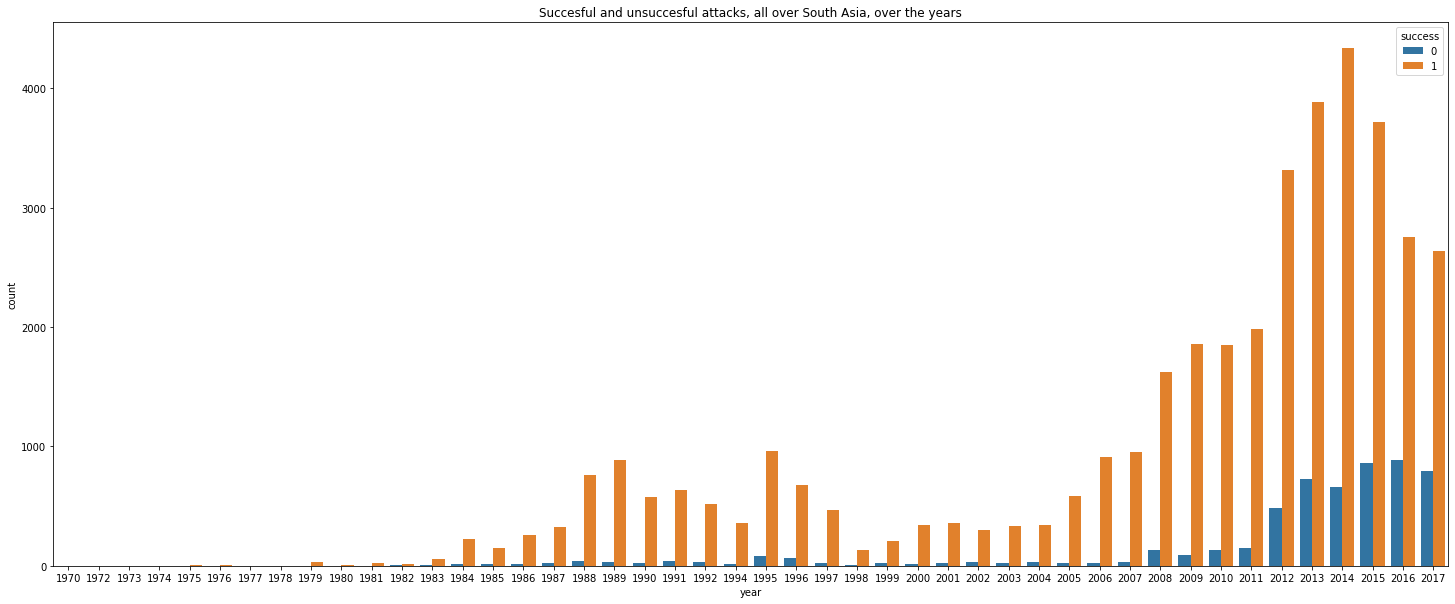

In [26]:
#South Asia
sns.countplot(x='year',hue='success',data=gtd_SA)
plt.title('Succesful and unsuccesful attacks, all over South Asia, over the years')
plt.show()

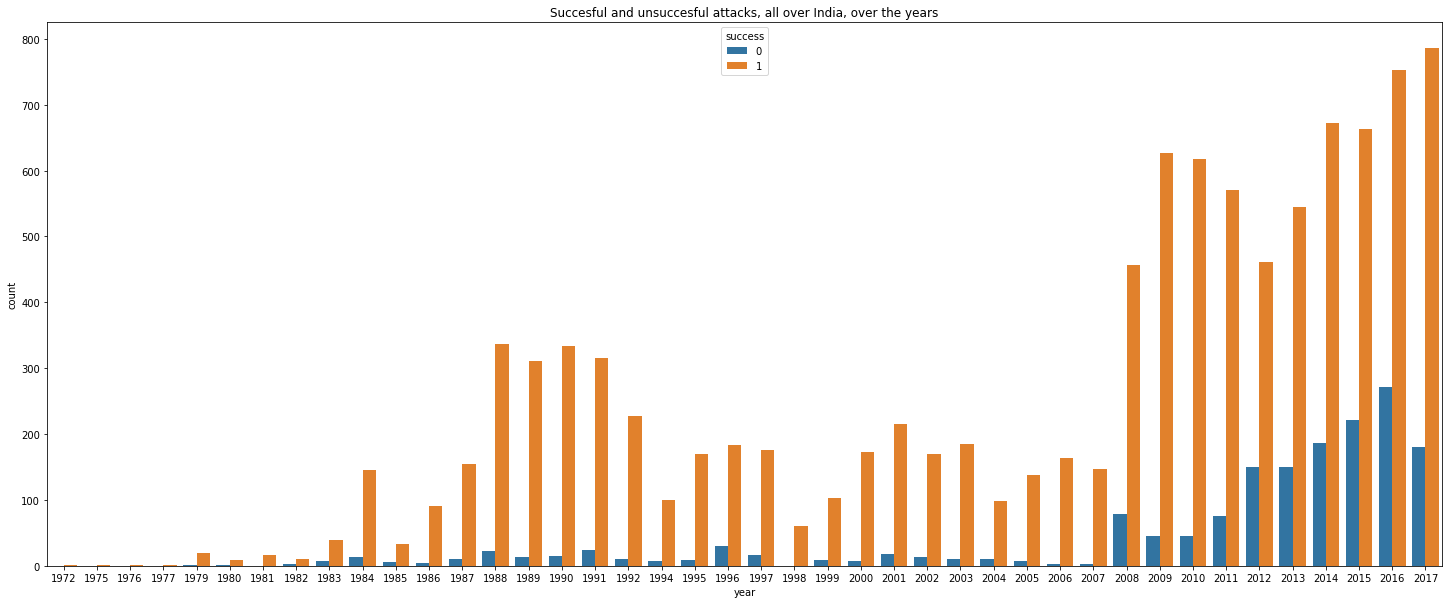

In [27]:
#India
sns.countplot(x='year',hue='success',data=gtd_india)
plt.title('Succesful and unsuccesful attacks, all over India, over the years')
plt.show()


**Remarks**

1. A common trend can be observced at all three levels that the number of succesful attacks have been on a gradual increase over the time.
2. But the unsuccesful attacks or in other words, our ability to render those attacks unsuccesful has not been able to keep up with it. In short, Terrorism has been winning over the years.

**Calculating success rates of organisations**

In [28]:
#Sorting the attack fequencies in descending order
global_org_frequency.sort_values('attacks',ascending=False,inplace=True)
india_org_frequency.sort_values('attacks',ascending=False,inplace=True)
SA_org_frequency.sort_values('attacks',ascending=False,inplace=True)

In [29]:
#creating df with number of succesful attacks
global_org_success=gtd_global.groupby('organisation')['success'].sum().reset_index().sort_values('success',ascending=False)#Since the succesful attacks has been represented by 
                                                                                                                           #1,the sum woud give us total number of succesful attacks
SA_org_success=gtd_SA.groupby('organisation')['success'].sum().reset_index().sort_values('success',ascending=False)

india_org_success=gtd_india.groupby('organisation')['success'].sum().reset_index().sort_values('success',ascending=False)

In [30]:
#reseting index of the organisation frequency df and group_success_df to be able to merge df going forwards
global_org_frequency.reset_index(drop=True,inplace=True)
global_org_success.reset_index(drop=True,inplace=True)

SA_org_frequency.reset_index(drop=True,inplace=True)
SA_org_success.reset_index(drop=True,inplace=True)

india_org_frequency.reset_index(drop=True,inplace=True)
india_org_success.reset_index(drop=True, inplace=True)

In [31]:
#adding attack column to the succes data frame 
global_org_success['attacks']=global_org_frequency.attacks
SA_org_success['attacks']=SA_org_frequency.attacks
india_org_success['attacks']=india_org_frequency.attacks

In [32]:
#sorting on basis of oganisation to maintain consistency. We will sort the df on basis of attacks later on when everything is settled
global_org_success.sort_values('organisation',inplace=True)
SA_org_success.sort_values('organisation',inplace=True)
india_org_success.sort_values('organisation',inplace=True)

In [33]:
#calculating succes rate= number of succesful attacks / number of total attacks * 100
global_org_success['succes_rate_percentage']=round((global_org_success.success/global_org_success.attacks)*100,2)
india_org_success['succes_rate_percentage']=round((india_org_success.success/india_org_success.attacks)*100,2)
SA_org_success['succes_rate_percentage']=round((SA_org_success.success/SA_org_success.attacks)*100,2)

Now are succes rate dataframe is ready. Let's take a look at one of them

In [34]:
global_org_success.head()

,organisation,success,attacks,succes_rate_percentage
585,1 May,9,10,90.0
905,14 K Triad,4,5,80.0
2683,14 March Coalition,1,1,100.0
1256,14th of December Command,3,3,100.0
2682,15th of September Liberation Legion,1,1,100.0


So the dataframe is currently sorted on basis of organisation name. We need a more sensible parameter. We can look at the organisations with highest succes rate probably?
But there are quite a few organisations with very low number of attack frequency, and they are bound to have a hugh succes rate owing to that. For instance, an organisation has carried out 1 attack and that's succesful! WHOA! 100% succes rate! (No, not quite so :/). So succes rate isn't the parameter we should be sorting them on.

Attack frequency is. We should be looking at succes rate of organisation with high number of attacks. Let's get to that.

In [35]:
print("Groups with highest attack frequency over the globe, and their success rate")
global_org_success.sort_values('attacks',ascending=False,inplace=True)
global_org_success.head(6)

Groups with highest attack frequency over the globe, and their success rate


,organisation,success,attacks,succes_rate_percentage
0,Unknown,71748,82782,86.67
1,Taliban,6680,7478,89.33
2,Islamic State of Iraq and the Levant (ISIL),4759,5613,84.79
3,Shining Path (SL),4337,4555,95.21
4,Farabundo Marti National Liberation Front (FMLN),3317,3351,98.99
5,Al-Shabaab,3016,3288,91.73


In [36]:
print("Groups with highest attack frequency over south Asia, and their success rate")
SA_org_success.sort_values('attacks',ascending=False,inplace=True)
SA_org_success.head(6)

Groups with highest attack frequency over south Asia, and their success rate


,organisation,success,attacks,succes_rate_percentage
0,Unknown,18385,21913,83.90
1,Taliban,6679,7477,89.33
2,Communist Party of India - Maoist (CPI-Maoist),1774,1878,94.46
3,Liberation Tigers of Tamil Eelam (LTTE),1529,1625,94.09
4,Maoists,1304,1604,81.30
5,Tehrik-i-Taliban Pakistan (TTP),1267,1350,93.85


In [37]:
print("Groups with top 5 highest attack frequency in India, and their success rate")
india_org_success.sort_values('attacks',ascending=False,inplace=True)
india_org_success.head(6)

Groups with top 5 highest attack frequency in India, and their success rate


,organisation,success,attacks,succes_rate_percentage
0,Unknown,3337,4263,78.28
1,Communist Party of India - Maoist (CPI-Maoist),1773,1877,94.46
2,Maoists,1083,1396,77.58
3,Sikh Extremists,667,710,93.94
4,United Liberation Front of Assam (ULFA),327,357,91.60
5,Hizbul Mujahideen (HM),182,199,91.46


Let's put up some visualisations for these

**Git hub is not able to display few visualisations generated here using plotly.express. Kindly redirect to the code cell in google colaboratory notebook using following link to see the visualization:**
[link text](https://colab.research.google.com/drive/1y0l-stmOruN3uDceQMJIM57zQ6T7l63U#scrollTo=LSdwWK8jNiGt&line=6&uniqifier=1)

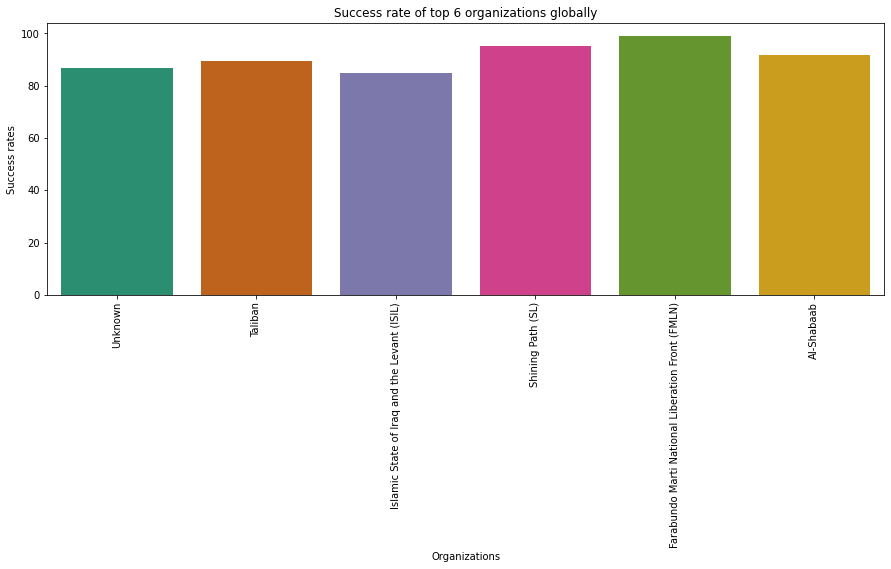

In [38]:
#plotting succes rates across the globe, South Asia and India
plt.rcParams['figure.figsize']=[15,5]

#global
sns.barplot(x=global_org_success[:6].organisation, #bar plot
            y=global_org_success[:6].succes_rate_percentage,
            palette='Dark2')
plt.title('Success rate of top 6 organizations globally')
plt.xlabel("Organizations")
plt.ylabel("Success rates")
plt.xticks(rotation=90)
plt.show()

table_global = go.Figure(data=[go.Table(  #tabular representation
    header=dict(values=list(global_org_success.columns),
                fill_color='pink',
                align='left'),
    cells=dict(values=[global_org_success[:6].organisation, global_org_success[:6].success, global_org_success[:6].attacks,global_org_success[:6].succes_rate_percentage],
               fill_color='lavender',
               align='left'))
])
table_global.show()



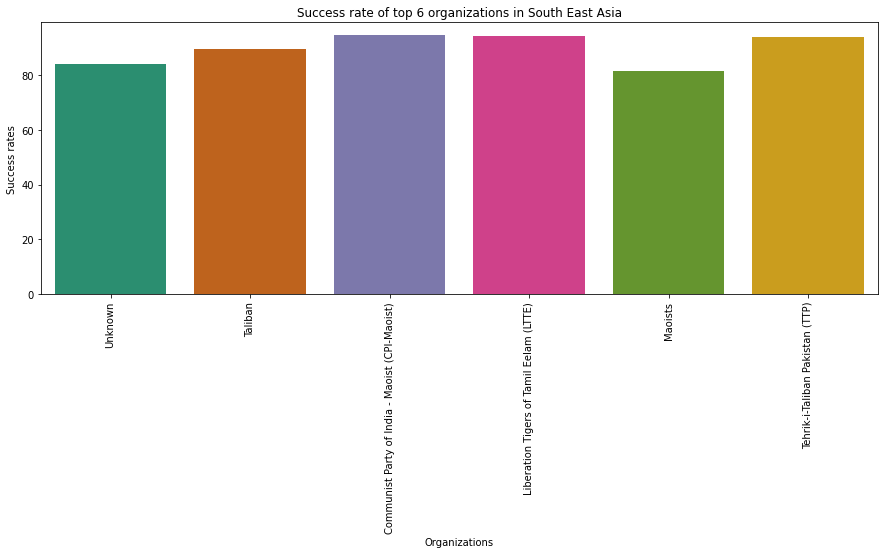

In [39]:
#south asian
sns.barplot(x=SA_org_success[:6].organisation,y=SA_org_success[:6].succes_rate_percentage,palette='Dark2')
plt.title('Success rate of top 6 organizations in South East Asia')
plt.xlabel("Organizations")
plt.ylabel("Success rates")
plt.xticks(rotation=90)
plt.show()

table_SA = go.Figure(data=[go.Table(
    header=dict(values=list(SA_org_success.columns),
                fill_color='pink',
                align='left'),
    cells=dict(values=[SA_org_success[:6].organisation, SA_org_success[:6].success, SA_org_success[:6].attacks,SA_org_success[:6].succes_rate_percentage],
               fill_color='lavender',
               align='left'))
])
table_SA.show()

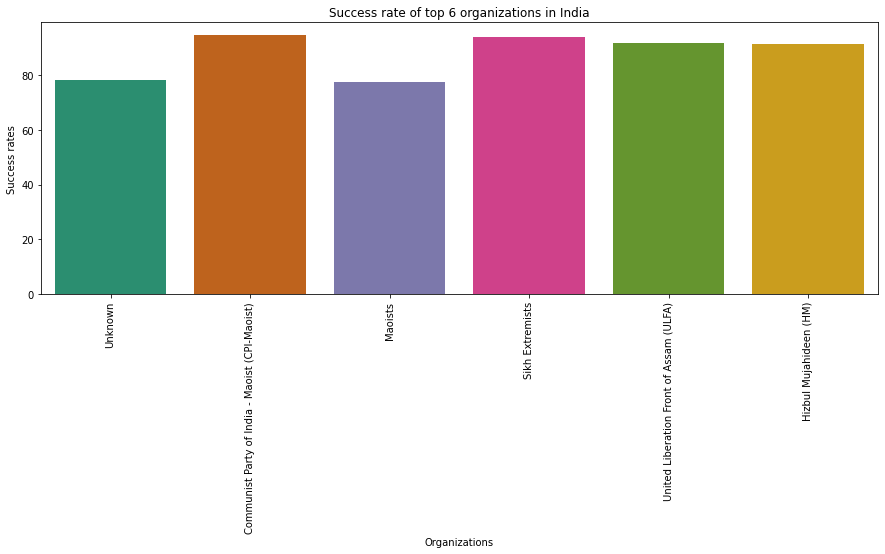

In [40]:
#India
sns.barplot(x=india_org_success[:6].organisation,y=india_org_success[:6].succes_rate_percentage,palette='Dark2')
plt.title('Success rate of top 6 organizations in India')
plt.xlabel("Organizations")
plt.ylabel("Success rates")
plt.xticks(rotation=90)
plt.show()

table_india = go.Figure(data=[go.Table(
    header=dict(values=list(india_org_success.columns),
                fill_color='pink',
                align='left'),
    cells=dict(values=[india_org_success[:6].organisation, india_org_success[:6].success, india_org_success[:6].attacks,india_org_success[:6].succes_rate_percentage],
               fill_color='lavender',
               align='left'))
])
table_india.show()

**Remarks:**
From the analysis, we can see that the organisations with highest attack frequency are not essentially the most efficient ones. For instance, Farabundo Marti National Liberation Front (FMLN) on a global level has put up a significant 3351 number of attacks and has a success rate of over 98%.

So let's say if FMLN gets to scale it's resources to increase there attack frequency, they might prove to be more damage inducing than Taliban. So these are the organisations we need to look out for in the future.

Same goes for Shining Path (SL) at global, Liberation Tigers of Tamil Eelam (LTTE) at south asian, and Sikh Extremists at Indian level, which has succes rates of over 90%.

#4. Success rates of different attack types.

What is the succes rate that different attack types has yielded historically?

**Global**

In [41]:
#creating df grouped by attack type and there frequency
global_attacktype_frequency=gtd_global.groupby('attack_type')['eventid'].count().reset_index().rename(columns={'eventid':'attacks'})

#creating df of attack types that were successful
global_attacktype_success=gtd_global.groupby('attack_type')['success'].sum().reset_index().rename(columns={'success':'succesful_attacks'})

#resetting index 
global_attacktype_success.reset_index(drop=True,inplace=True)
global_attacktype_frequency.reset_index(drop=True,inplace=True)

In [42]:
#sorting according to attack type so that total attacks and succesful attacks can match up
global_attacktype_frequency.sort_values('attack_type',inplace=True)
global_attacktype_success.sort_values('attack_type',inplace=True)

In [43]:
#adding total attacks column to succesful_attacks df
global_attacktype_success['total_attacks']=global_attacktype_frequency['attacks']

In [44]:
#adding succes rate columns to the succesful attacks df
global_attacktype_success['succes_rate_percentage']= round((global_attacktype_success.succesful_attacks / global_attacktype_success.total_attacks) *100,2)

In [45]:
#sorting by success rate
global_attacktype_success.sort_values('succes_rate_percentage',ascending=False,inplace=True)

In [46]:
global_attacktype_success

,attack_type,succesful_attacks,total_attacks,succes_rate_percentage
5,Hostage Taking (Barricade Incident),983,991,99.19
6,Hostage Taking (Kidnapping),10907,11158,97.75
0,Armed Assault,40345,42669,94.55
3,Facility/Infrastructure Attack,9779,10356,94.43
4,Hijacking,579,659,87.86
2,Bombing/Explosion,77530,88255,87.85
7,Unarmed Assault,879,1015,86.60
8,Unknown,6015,7276,82.67
1,Assassination,14615,19312,75.68


**South Asia**


In [47]:
#creating df grouped by attack type and there frequency
SA_attacktype_frequency=gtd_SA.groupby('attack_type')['eventid'].count().reset_index().rename(columns={'eventid':'attacks'})

#creating df of attack types that were successful
SA_attacktype_success=gtd_SA.groupby('attack_type')['success'].sum().reset_index().rename(columns={'success':'succesful_attacks'})

#resetting index 
SA_attacktype_success.reset_index(drop=True,inplace=True)
SA_attacktype_frequency.reset_index(drop=True,inplace=True)

In [48]:
#sorting according to attack type so that total attacks and succesful attacks can match up
SA_attacktype_frequency.sort_values('attack_type',inplace=True)
SA_attacktype_success.sort_values('attack_type',inplace=True)

In [49]:
#adding total attacks column to succesful_attacks df
SA_attacktype_success['total_attacks']=SA_attacktype_frequency['attacks']

In [50]:
#adding succes rate columns to the succesful attacks df
SA_attacktype_success['succes_rate_percentage']= round((SA_attacktype_success.succesful_attacks / SA_attacktype_success.total_attacks) *100,2)

In [51]:
#sorting by success rate
SA_attacktype_success.sort_values('succes_rate_percentage',ascending=False,inplace=True)

In [52]:
SA_attacktype_success

,attack_type,succesful_attacks,total_attacks,succes_rate_percentage
5,Hostage Taking (Barricade Incident),118,120,98.33
6,Hostage Taking (Kidnapping),3219,3277,98.23
7,Unarmed Assault,315,323,97.52
3,Facility/Infrastructure Attack,2127,2189,97.17
0,Armed Assault,10698,11404,93.81
4,Hijacking,84,93,90.32
2,Bombing/Explosion,18029,21246,84.86
8,Unknown,1628,2021,80.55
1,Assassination,3151,4301,73.26


**India**

In [53]:
#creating df grouped by attack type and there frequency
india_attacktype_frequency=gtd_india.groupby('attack_type')['eventid'].count().reset_index().rename(columns={'eventid':'attacks'})

#creating df of attack types that were successful
india_attacktype_success=gtd_india.groupby('attack_type')['success'].sum().reset_index().rename(columns={'success':'succesful_attacks'})

#resetting index 
india_attacktype_success.reset_index(drop=True,inplace=True)
india_attacktype_frequency.reset_index(drop=True,inplace=True)

In [54]:
#sorting according to attack type so that total attacks and succesful attacks can match up
india_attacktype_frequency.sort_values('attack_type',inplace=True)
india_attacktype_success.sort_values('attack_type',inplace=True)

In [55]:
#adding total attacks column to succesful_attacks df
india_attacktype_success['total_attacks']=india_attacktype_frequency['attacks']

In [56]:
#adding succes rate columns to the succesful attacks df
india_attacktype_success['succes_rate_percentage']= round((india_attacktype_success.succesful_attacks / india_attacktype_success.total_attacks) *100,2)

In [57]:
#sorting by success rate
india_attacktype_success.sort_values('succes_rate_percentage',ascending=False,inplace=True)

In [58]:
india_attacktype_success

,attack_type,succesful_attacks,total_attacks,succes_rate_percentage
7,Unarmed Assault,142,143,99.30
6,Hostage Taking (Kidnapping),1168,1184,98.65
5,Hostage Taking (Barricade Incident),43,44,97.73
3,Facility/Infrastructure Attack,963,996,96.69
0,Armed Assault,2940,3184,92.34
8,Unknown,287,312,91.99
4,Hijacking,39,43,90.70
1,Assassination,1001,1229,81.45
2,Bombing/Explosion,3697,4825,76.62


In [59]:
gtd_india.groupby('attack_type')['success'].sum()

attack_type
Armed Assault                          2940
Assassination                          1001
Bombing/Explosion                      3697
Facility/Infrastructure Attack          963
Hijacking                                39
Hostage Taking (Barricade Incident)      43
Hostage Taking (Kidnapping)            1168
Unarmed Assault                         142
Unknown                                 287
Name: success, dtype: int64

In [60]:
gtd_india.groupby('attack_type')['eventid'].count()

attack_type
Armed Assault                          3184
Assassination                          1229
Bombing/Explosion                      4825
Facility/Infrastructure Attack          996
Hijacking                                43
Hostage Taking (Barricade Incident)      44
Hostage Taking (Kidnapping)            1184
Unarmed Assault                         143
Unknown                                 312
Name: eventid, dtype: int64

In [61]:
#adding casuality column to the dataframes for being able to compare the casualities contributed by the attack types
global_attacktype_success['casuality']=gtd_global.groupby('attack_type')['casuality'].sum().reset_index()['casuality']
SA_attacktype_success['casuality']=gtd_SA.groupby('attack_type')['casuality'].sum().reset_index()['casuality']
india_attacktype_success['casuality']= gtd_india.groupby('attack_type')['casuality'].sum().reset_index()['casuality']



**Git hub is not able to display the visualisations generated here using plotly.express. Kindly redirect to the code cell in google colaboratory notebook using following link to see the visualisation:**
[link text](https://colab.research.google.com/drive/1y0l-stmOruN3uDceQMJIM57zQ6T7l63U#scrollTo=qQ4fMfrO_8pb&line=8&uniqifier=1)

In [62]:
fig_global=px.bar(data_frame=global_attacktype_success,
                  x='attack_type',y='succes_rate_percentage',
                  hover_data=['casuality'],color='casuality',
                  title='Succes rates of attack types over the globe')


fig_SA=px.bar(data_frame=SA_attacktype_success,
              x='attack_type',y='succes_rate_percentage',
              hover_data=['casuality'],color='casuality',
              title='Succes rates of attack types over South Asia')


fig_india=px.bar(data_frame=india_attacktype_success,
                 x='attack_type',y='succes_rate_percentage',
                 hover_data=['casuality'],color='casuality',
                 title='Succes rates of attack types in India')

fig_global.show()
fig_SA.show()
fig_india.show()

# 5. Actions of major groups

1. Taliban has come out to be the organisation with most attack frequencies at global as well as South Asian level and CPI(Maoist) in India.
2. How much ground has these two organisations covered in terms of number of countries?
3. What are the attack types they predominantly use and what are the casuality statisitics for these organisation?

These statistics can be visually represented very efficiently using an interactive sun burst chart from plotly.express library. Let's have a look.

In [63]:
gtd_global_taliban=gtd_global[gtd_global.organisation=='Taliban']# a subset of global dataset with data exclusively regarding Taliban
gtd_global_maoist=gtd_global[gtd_global.organisation=='Communist Party of India - Maoist (CPI-Maoist)'] #a subset of global dataset with data exclusively regarding CPI(Maoist)

**Git hub is not able to display the visualisations generated here using plotly.express. Kindly redirect to the code cell in google colaboratory notebook using following link to see the visualisation:**
[link text](https://colab.research.google.com/drive/1y0l-stmOruN3uDceQMJIM57zQ6T7l63U#scrollTo=5CKggeKfL7BM&line=2&uniqifier=1)


In [70]:
fig_taliban=px.sunburst(gtd_global_taliban,values='casuality',
                path=['country','attack_type','weapon_type'],
                color_discrete_sequence=px.colors.qualitative.Dark24,
                title='Fatalities caused by Taliban in different countries, grouped by attack types, and weapon types')

fig_maoists=px.sunburst(gtd_global_maoist,values='casuality',
                path=['country','attack_type','weapon_type'],
                color_discrete_sequence=px.colors.qualitative.Dark24,
                title='Fatalities caused by Maoists in different countries, grouped by attack types, and weapon types')

fig_taliban.show()
fig_maoists.show()

Directions:

* In the above chart, the innermost circle represents the countries the organisation have caused casualities in. The area is determined by the number of casualities.


*   The second cocentric circle represents the attack type used to cause the casualities and finally the outermost circle represents the weapon type used
*   You can hover over the area to see the exact figures and click on area to generate sun burst chart of that specific parameter



  





**Remarks**

**Taliban**:
1. It's interesting to note that, even though Taliban has the highest contribution
to the total number of attacks in the world, they have caused casulaities in a total of just 3 countries: Afghanistan(57140 casualities), Pakistan (197 casualites) and Turkmenistan (5 casualities).
2. Taliban has caused most casualities using Bombing/Explosions (24650) followed by Armed Assaults (18901) and unknown attack types(7149).
3. Explosives (24639) and Firearms(17466) are the most common weapon types used by Taliban.


**CPI (Maoists):**
1. As expected, CPI-Maoists are most active in India(4007 casualities), and 2 casuality in Nepal.
2. They have caused most casualities using Armed Assaults(1848) followed by Bombing/Explosions (1164) and unknown attack types(437)
3. Firearms(1483) and Explosvies(1160) again, are the most common weapon types used by this organisation as well.


# Which organisation has covered the most ground?

Since the two groups which has highest frequency of attacks in global and Indian region are only concentrated in a single country, it made me curious about which organisation has covered most ground in terms of number of countries.

In [65]:
#We are going to formulate a dataframe of global subset grouped by organisation and country, and group the resulting data frame by organisation as follows:
organisation_country_freq_df=gtd_global.groupby(['organisation','country'])['eventid'].count().reset_index()
organisation_country_freq_df.groupby('organisation')['country'].count().reset_index().sort_values('country',ascending=False)


,organisation,country
3408,Unknown,192
2138,Muslim extremists,51
1329,Gunmen,50
2910,Separatists,30
685,Black September,29
...,...,...
1273,Golden Dawn,1
1274,Gono Bahini (GB),1
1275,Good Vision Party (India),1
1276,Gorkha Janmukti Morcha (GJM),1


It's found that, Muslim Extremists has covered the most ground followed by Gunmen and Separatists.

Let's have a look at their sunburst charts

Git hub is not able to display the visualisations generated here using plotly.express. Kindly redirect to the code cell in google colaboratory notebook using following link to see the visualisation:
[link text](https://colab.research.google.com/drive/1y0l-stmOruN3uDceQMJIM57zQ6T7l63U#scrollTo=NFdxOK1YWheT&line=11&uniqifier=1)

In [66]:
#Creating dataframes exclusive to aforementioned three organisations
gtd_muslim_extremists=gtd_global[gtd_global.organisation=='Muslim extremists']
gtd_gunmen=gtd_global[gtd_global.organisation=='Gunmen']
gtd_separatists=gtd_global[gtd_global.organisation=='Separatists']

In [71]:
#creating sun burst chart for each of the three organisations
fig_muslim_extremists=px.sunburst(gtd_muslim_extremists,values='casuality',
                path=['country','attack_type','target_type'],
                color_discrete_sequence=px.colors.qualitative.Dark24,
                title='Fatalities caused by Muslim Extremists in different countries, grouped by attack types and target types')

fig_muslim_extremists.show()

fig_gunmen=px.sunburst(gtd_gunmen,values='casuality',
                path=['country','attack_type','target_type'],
                color_discrete_sequence=px.colors.qualitative.Dark24,
                title='Fatalities caused by Gunmen in different countries, grouped by attack types and target types')

fig_gunmen.show()

fig_separatists=px.sunburst(gtd_separatists,values='casuality',
                path=['country','attack_type','target_type'],
                color_discrete_sequence=px.colors.qualitative.Dark24,
                title='Fatalities caused by Separatists in different countries, grouped by attack types and target types')

fig_separatists.show()

**Remarks**

These charts are very rich in data, and can be used to gather many insights. Here are the major ones that I found:

**Muslim Extremists:**


*   Countries caused casualities in : 51 
*   Country caused most casualities in: Syria; 600 casualities
*   Preferred Attack type: Bombing Explosions
*   Preferred weapon type: Explosives


**Gunmen:**


*   Countries caused casualities in : 50
*   Country caused most casualities in: India; 113 Casualities 
*   Preferred Attack type: Bombing Explosions
*   Preferred weapon type: Explosives


**Separatists:**



*   Countries caused casualities in : 30
*   Country caused most casualities in: Thailand; 1256 Casualities 
*   Preferred Attack type: Bombing Explosions
*   Preferred weapon type: Explosives
















# Heat Maps
 Organisations Vs Attack type:
 What are the preffered attack types?

In [72]:
#For sake of readability of the heat map, I'm going to consider the organisation that have been in involved in top 50 attacks in terms of casuality.
gtd_global_casualities=gtd_global.sort_values('casuality',ascending=False)[:50]
gtd_global_casualities.head()

,eventid,year,month,day,country,region,city,state,latitude,longitude,summary,success,suicide,attack_type,target_type,organisation,claimed,motive,weapon_type,nkill,nwound,propvalue,casuality
73126,200109110004,2001,9,11,United States,North America,New York City,New York,40.6971,-73.9314,09/11/2001: This was one of four related attac...,1,1,Hijacking,Private Citizens & Property,Al-Qaida,1.0,Unknown,Vehicle (not to include vehicle-borne explosiv...,1384.0,8190.0,0.0,9574.0
73127,200109110005,2001,9,11,United States,North America,New York City,New York,40.6971,-73.9314,09/11/2001: This was one of four related attac...,1,1,Hijacking,Private Citizens & Property,Al-Qaida,1.0,Unknown,Vehicle (not to include vehicle-borne explosiv...,1383.0,8191.0,0.0,9574.0
58841,199503200014,1995,3,20,Japan,East Asia,Tokyo,Tokyo,35.6891,139.748,Unknown,1,0,Unarmed Assault,Transportation,Aum Shinri Kyo,0.0,Unknown,Chemical,13.0,5500.0,0.0,5513.0
68071,199808070002,1998,8,7,Kenya,Sub-Saharan Africa,Nairobi,Nairobi,-1.28518,36.8211,08/07/1998: Suicide attackers detonated a vehi...,1,1,Bombing/Explosion,Government (Diplomatic),Al-Qaida,1.0,Unknown,Explosives,224.0,4000.0,0.0,4224.0
133518,201406150063,2014,6,12,Iraq,Middle East & North Africa,Tikrit,Saladin,34.6215,43.6684,06/12/2014: Assailants abducted approximately ...,1,0,Hostage Taking (Kidnapping),Military,Islamic State of Iraq and the Levant (ISIL),1.0,The Islamic State of Iraq and the Levant (ISIL...,Firearms,1570.0,0.0,0.0,1570.0


In [75]:
#grouping by organisation and attack type with casuality.sum() of the top 100 attacks according to casuality.
gtd_casuality_attack_type_df=gtd_global.sort_values('casuality',ascending=False)[:100].groupby(['organisation','attack_type'])['casuality'].sum().reset_index().rename(columns={'casuality':'casualities'}).sort_values('casualities',ascending=False)

In [76]:
gtd_casuality_attack_type_df

,organisation,attack_type,casualities
3,Al-Qaida,Hijacking,19148.0
2,Al-Qaida,Bombing/Explosion,6582.0
11,Aum Shinri Kyo,Unarmed Assault,6020.0
25,Islamic State of Iraq and the Levant (ISIL),Hostage Taking (Kidnapping),4483.0
55,Unknown,Bombing/Explosion,4448.0
23,Islamic State of Iraq and the Levant (ISIL),Bombing/Explosion,2811.0
4,Al-Qaida in Iraq,Bombing/Explosion,2702.0
32,Liberation Tigers of Tamil Eelam (LTTE),Bombing/Explosion,2215.0
54,Unknown,Armed Assault,1692.0
19,Hutu extremists,Armed Assault,1678.0


In [77]:
#making pivot table to be used to generate the heatmap.
casuality_attacktype_pivot=gtd_casuality_attack_type_df.pivot_table(index='organisation',columns='attack_type')
casuality_attacktype_pivot.fillna(0,inplace=True)
casuality_attacktype_pivot

casualities  ...        
attack_type                                        Armed Assault  ... Unknown
organisation                                                      ...        
Aisha Umm-al Mouemeneen (Brigades of Aisha)                  0.0  ...     0.0
Al-Nusrah Front                                              0.0  ...     0.0
Al-Qaida                                                     0.0  ...     0.0
Al-Qaida in Iraq                                             0.0  ...     0.0
Al-Qaida in the Arabian Peninsula (AQAP)                     0.0  ...     0.0
Al-Shabaab                                                   0.0  ...     0.0
Anti-Government extremists                                 910.0  ...     0.0
Armed Islamic Group (GIA)                                    0.0  ...     0.0
Arya                                                         0.0  ...     0.0
Aum Shinri Kyo                                               0.0  ...     0.0
Boko Haram                                                 315.0  ...     0.0
Communist Party of Nepal- Maoist (CPN-M)                   734.0  ...     0.0
Ethiopian People's Revolutionary Party                     500.0  ...     0.0
Front for the Liberation of Lebanon from Foreig...           0.0  ...     0.0
Harkatul Jihad-e-Islami                                      0.0  ...     0.0
Hezbollah                                                    0.0  ...     0.0
Hutu extremists                                           1678.0  ...   404.0
Islamic State of Iraq (ISI)                                  0.0  ...     0.0
Islamic State of Iraq and the Levant (ISIL)                670.0  ...     0.0
Jihadi-inspired extremists                                 520.0  ...     0.0
Jundallah (Iran)                                             0.0  ...     0.0
Kata'ib Hezbollah                                            0.0  ...     0.0
Khorasan Chapter of the Islamic State                        0.0  ...     0.0
Lashkar-e-Taiba (LeT)                                        0.0  ...     0.0
Liberation Tigers of Tamil Eelam (LTTE)                      0.0  ...   320.0
Lord's Resistance Army (LRA)                                 0.0  ...     0.0
Mozambique National Resistance Movement (MNR)              458.0  ...     0.0
Mujahedin-e Khalq (MEK)                                      0.0  ...     0.0
National Union for the Total Independence of An...         419.0  ...     0.0
Rajneeshees                                                  0.0  ...     0.0
Rebels                                                    1161.0  ...     0.0
Riyadus-Salikhin Reconnaissance and Sabotage Ba...           0.0  ...     0.0
Saudi Hezbollah                                              0.0  ...     0.0
Separatists                                                  0.0  ...     0.0
Sikh Extremists                                              0.0  ...     0.0
Sinai Province of the Islamic State                          0.0  ...     0.0
Sudan People's Liberation Movement in Oppositio...           0.0  ...     0.0
Taliban                                                    536.0  ...     0.0
Tawhid and Jihad                                             0.0  ...     0.0
Tehrik-i-Taliban Pakistan (TTP)                              0.0  ...     0.0
Tigray Peoples Liberation Front (TPLF)                       0.0  ...     0.0
Tutsi extremists                                             0.0  ...   375.0
Unknown                                                   1692.0  ...     0.0

[43 rows x 9 columns]

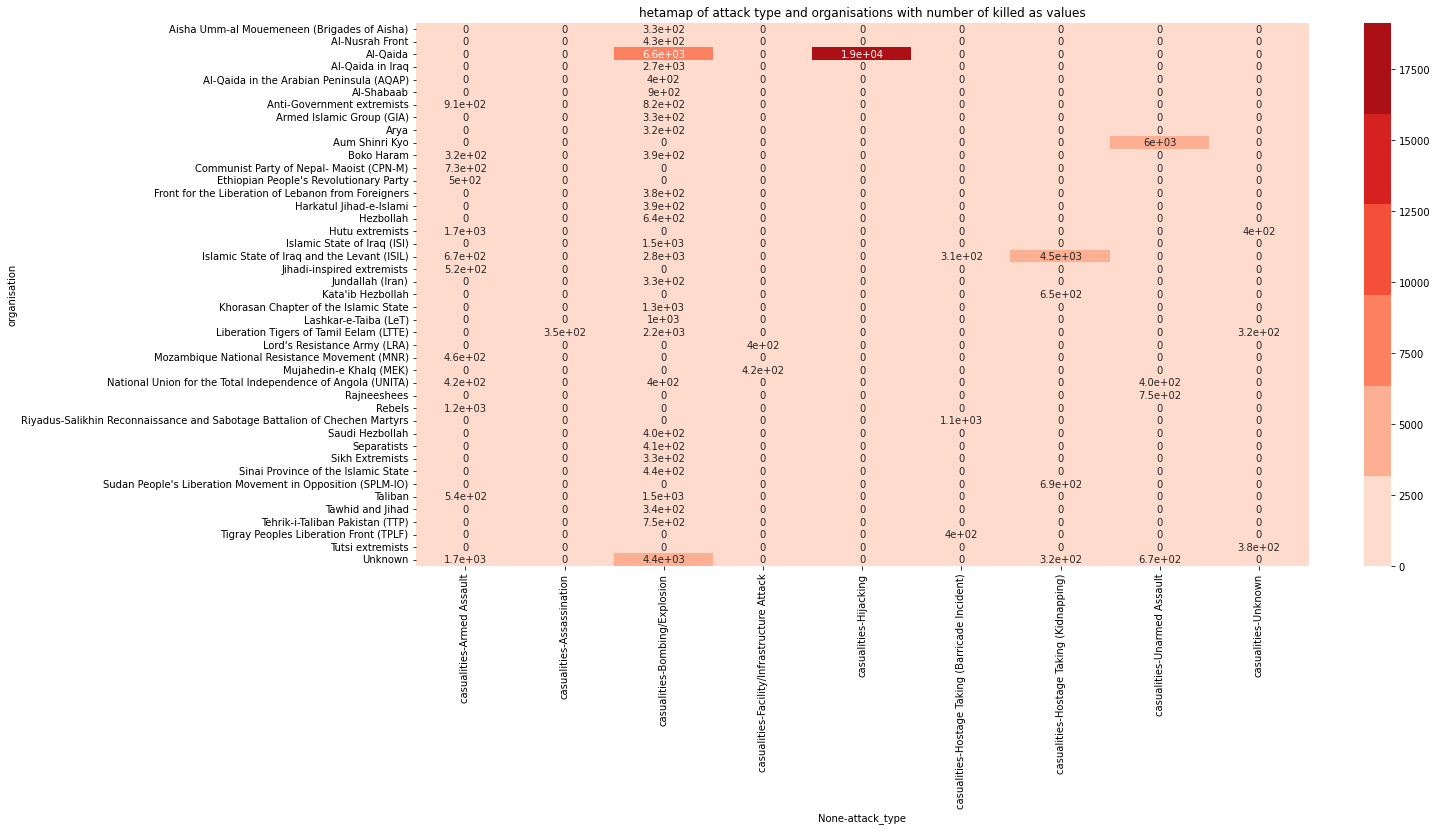

In [78]:
#generating heat map
colormap = sns.color_palette("Reds")
plt.figure(figsize=(20,10))
plt.title('hetamap of attack type and organisations with number of killed as values')
sns.heatmap(casuality_attacktype_pivot, vmin=-1, cmap=colormap, annot=True)


Remarks:

1) Armed Assaults and Bombing/Explosions are the most populated columns, indicating that they are the most sought after attack types by these organisations. This could also be the case since explosions and firearms have become increasingly accesible and deadlier over the time. 

2) Most of these organisations rely upon a single or atmost 3 types of attack types. This indicates that these organisations are focused on developing an expertise with certain attack types, rather than attempting upon multiple of them.

3)Al quaeda tops this chart with over 25000 casualities using hijacking.

Heat map with pivot of attack type and target type:


In [79]:
# grouping by attack type and target type
attack_target_casuality=gtd_global.groupby(['attack_type','target_type'])['casuality'].sum().reset_index()

In [80]:
attack_target_casuality_pivot=attack_target_casuality.pivot_table(index='attack_type',columns='target_type')
attack_target_casuality_pivot.fillna(0,inplace=True)
attack_target_casuality_pivot

casuality  ...                        
target_type                         Abortion Related  ... Violent Political Party
attack_type                                           ...                        
Armed Assault                                   12.0  ...                  3090.0
Assassination                                    9.0  ...                  1779.0
Bombing/Explosion                               11.0  ...                  3091.0
Facility/Infrastructure Attack                  11.0  ...                    14.0
Hijacking                                        0.0  ...                     0.0
Hostage Taking (Barricade Incident)             12.0  ...                     3.0
Hostage Taking (Kidnapping)                      0.0  ...                    89.0
Unarmed Assault                                  1.0  ...                    75.0
Unknown                                          0.0  ...                   779.0

[9 rows x 22 columns]

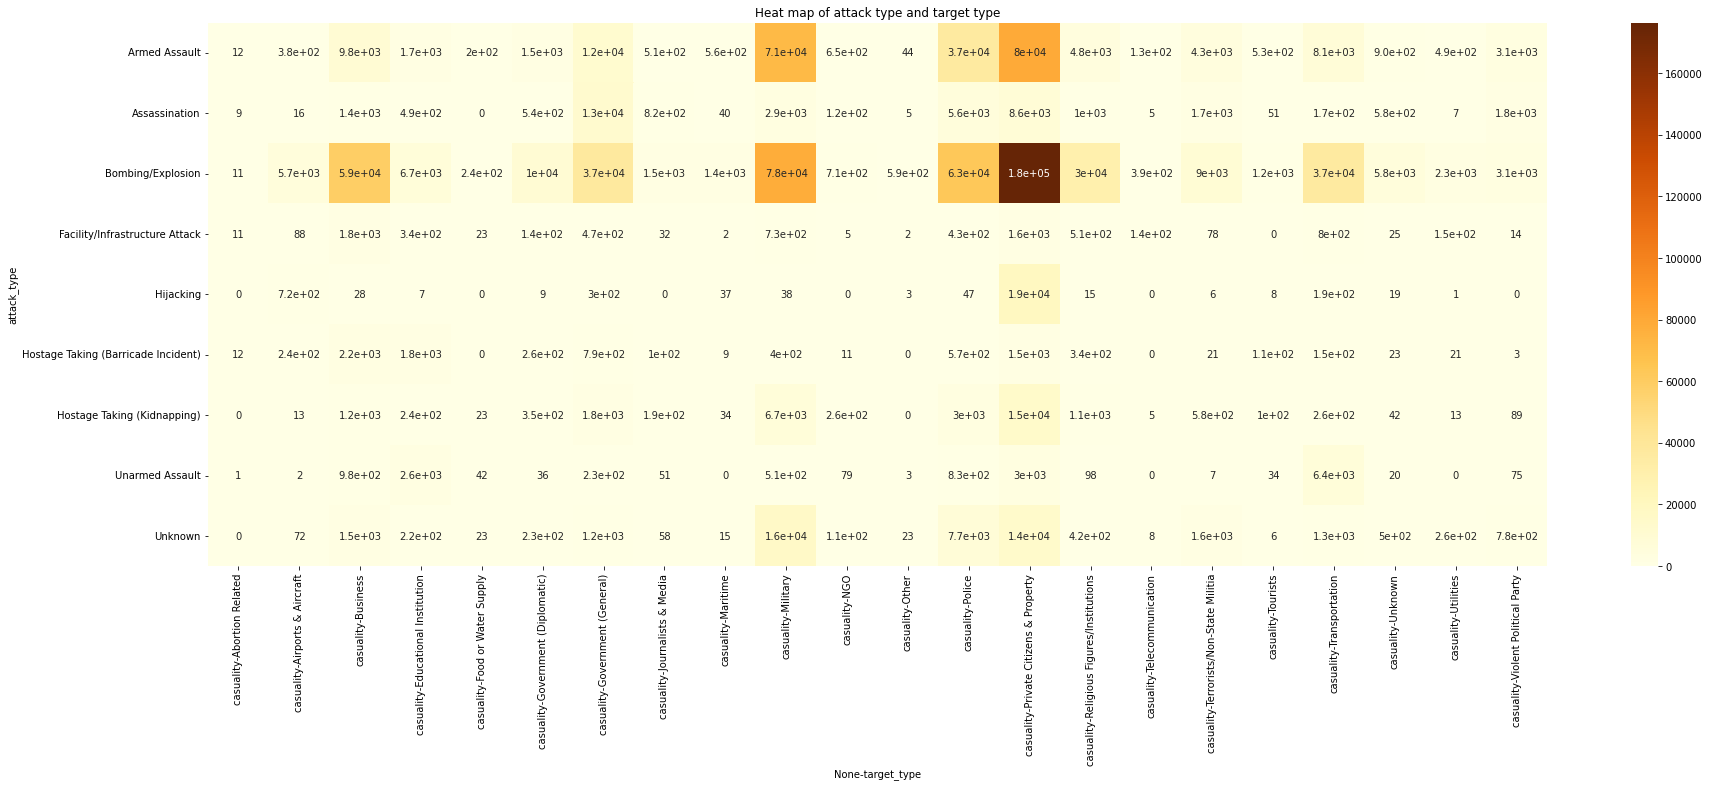

In [81]:
colormap =sns.color_palette("YlOrBr", as_cmap=True)
plt.figure(figsize=(30,10))
plt.title('Heat map of attack type and target type')
sns.heatmap(attack_target_casuality_pivot, vmin=-1, cmap=colormap, annot=True,)

# EXPERIMENTS

In [68]:
exp=gtd_global.groupby(['year','weapon_type'])['casuality'].sum().reset_index()
exp

,year,weapon_type,casuality
0,1970,Chemical,0.0
1,1970,Explosives,222.0
2,1970,Firearms,70.0
3,1970,Incendiary,47.0
4,1970,Melee,5.0
...,...,...,...
395,2017,Melee,718.0
396,2017,Other,11.0
397,2017,Sabotage Equipment,95.0
398,2017,Unknown,5999.0


In [69]:
px.histogram(exp,x='weapon_type',y='casuality',animation_frame='year')